In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

%matplotlib inline
sns.set(style='darkgrid')

## Get Data

In [2]:
columns = ['class', 'alcohol', 'malic_acid',
           'ash', 'alcalinity', 'magnesium',
           'phenols', 'flavanoids', 'nonflav_phenols',
           'proanth', 'color', 'hue', 'dil', 'proline']

df = pd.read_csv('data/wine.data',
                 names=columns,
                 index_col=None
                )

In [3]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflav_phenols,proanth,color,hue,dil,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploring the data

In [4]:
features = ['alcohol', 'malic_acid',
           'ash', 'alcalinity', 'magnesium',
           'phenols', 'flavanoids', 'nonflav_phenols',
           'proanth', 'color', 'hue', 'dil', 'proline']

In [5]:
features_df = df[features].copy()

### Statistical summary

In [6]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity,magnesium,phenols,flavanoids,nonflav_phenols,proanth,color,hue,dil,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Checking for missing values

In [7]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol            178 non-null float64
malic_acid         178 non-null float64
ash                178 non-null float64
alcalinity         178 non-null float64
magnesium          178 non-null int64
phenols            178 non-null float64
flavanoids         178 non-null float64
nonflav_phenols    178 non-null float64
proanth            178 non-null float64
color              178 non-null float64
hue                178 non-null float64
dil                178 non-null float64
proline            178 non-null int64
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Scaling the features

In [8]:
scaler = StandardScaler()
features_df[features] = scaler.fit_transform(features_df)

### Correlation matrix as a heatmap

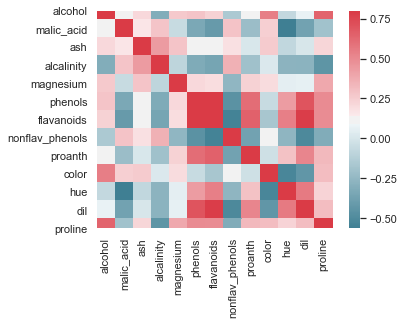

In [9]:
matrix = features_df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
h = sns.heatmap(matrix, cmap=colormap, vmax=0.8, square=True)
plt.show()
plt.close()

### Strong correlations between the following:

__phenols and flavanoids__ (Positive)<br>
__color and hue__ (Negative)<br>
__dil and flavanoids__ (Positive)<br>

In [10]:
plot_df = features_df.copy()
plot_df['class'] = df['class']
sns.set_palette('muted')
corr_features = [
    ['phenols', 'flavanoids'],
    ['color', 'hue'],
    ['dil', 'flavanoids'],
]

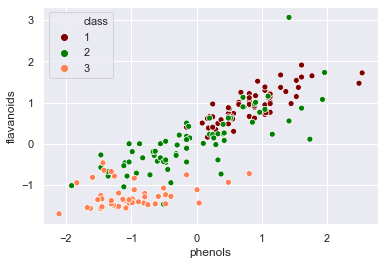

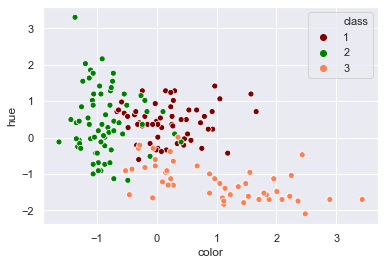

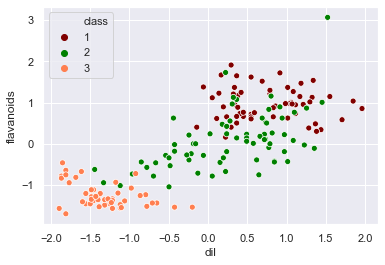

In [11]:
for cf in corr_features:
    s = sns.scatterplot(x=cf[0], y=cf[1],
                        data=plot_df, hue='class',
                        legend='full',
                        palette=['maroon', 'green', 'coral'])
    plt.show()
    plt.close()

### Find interesting relations

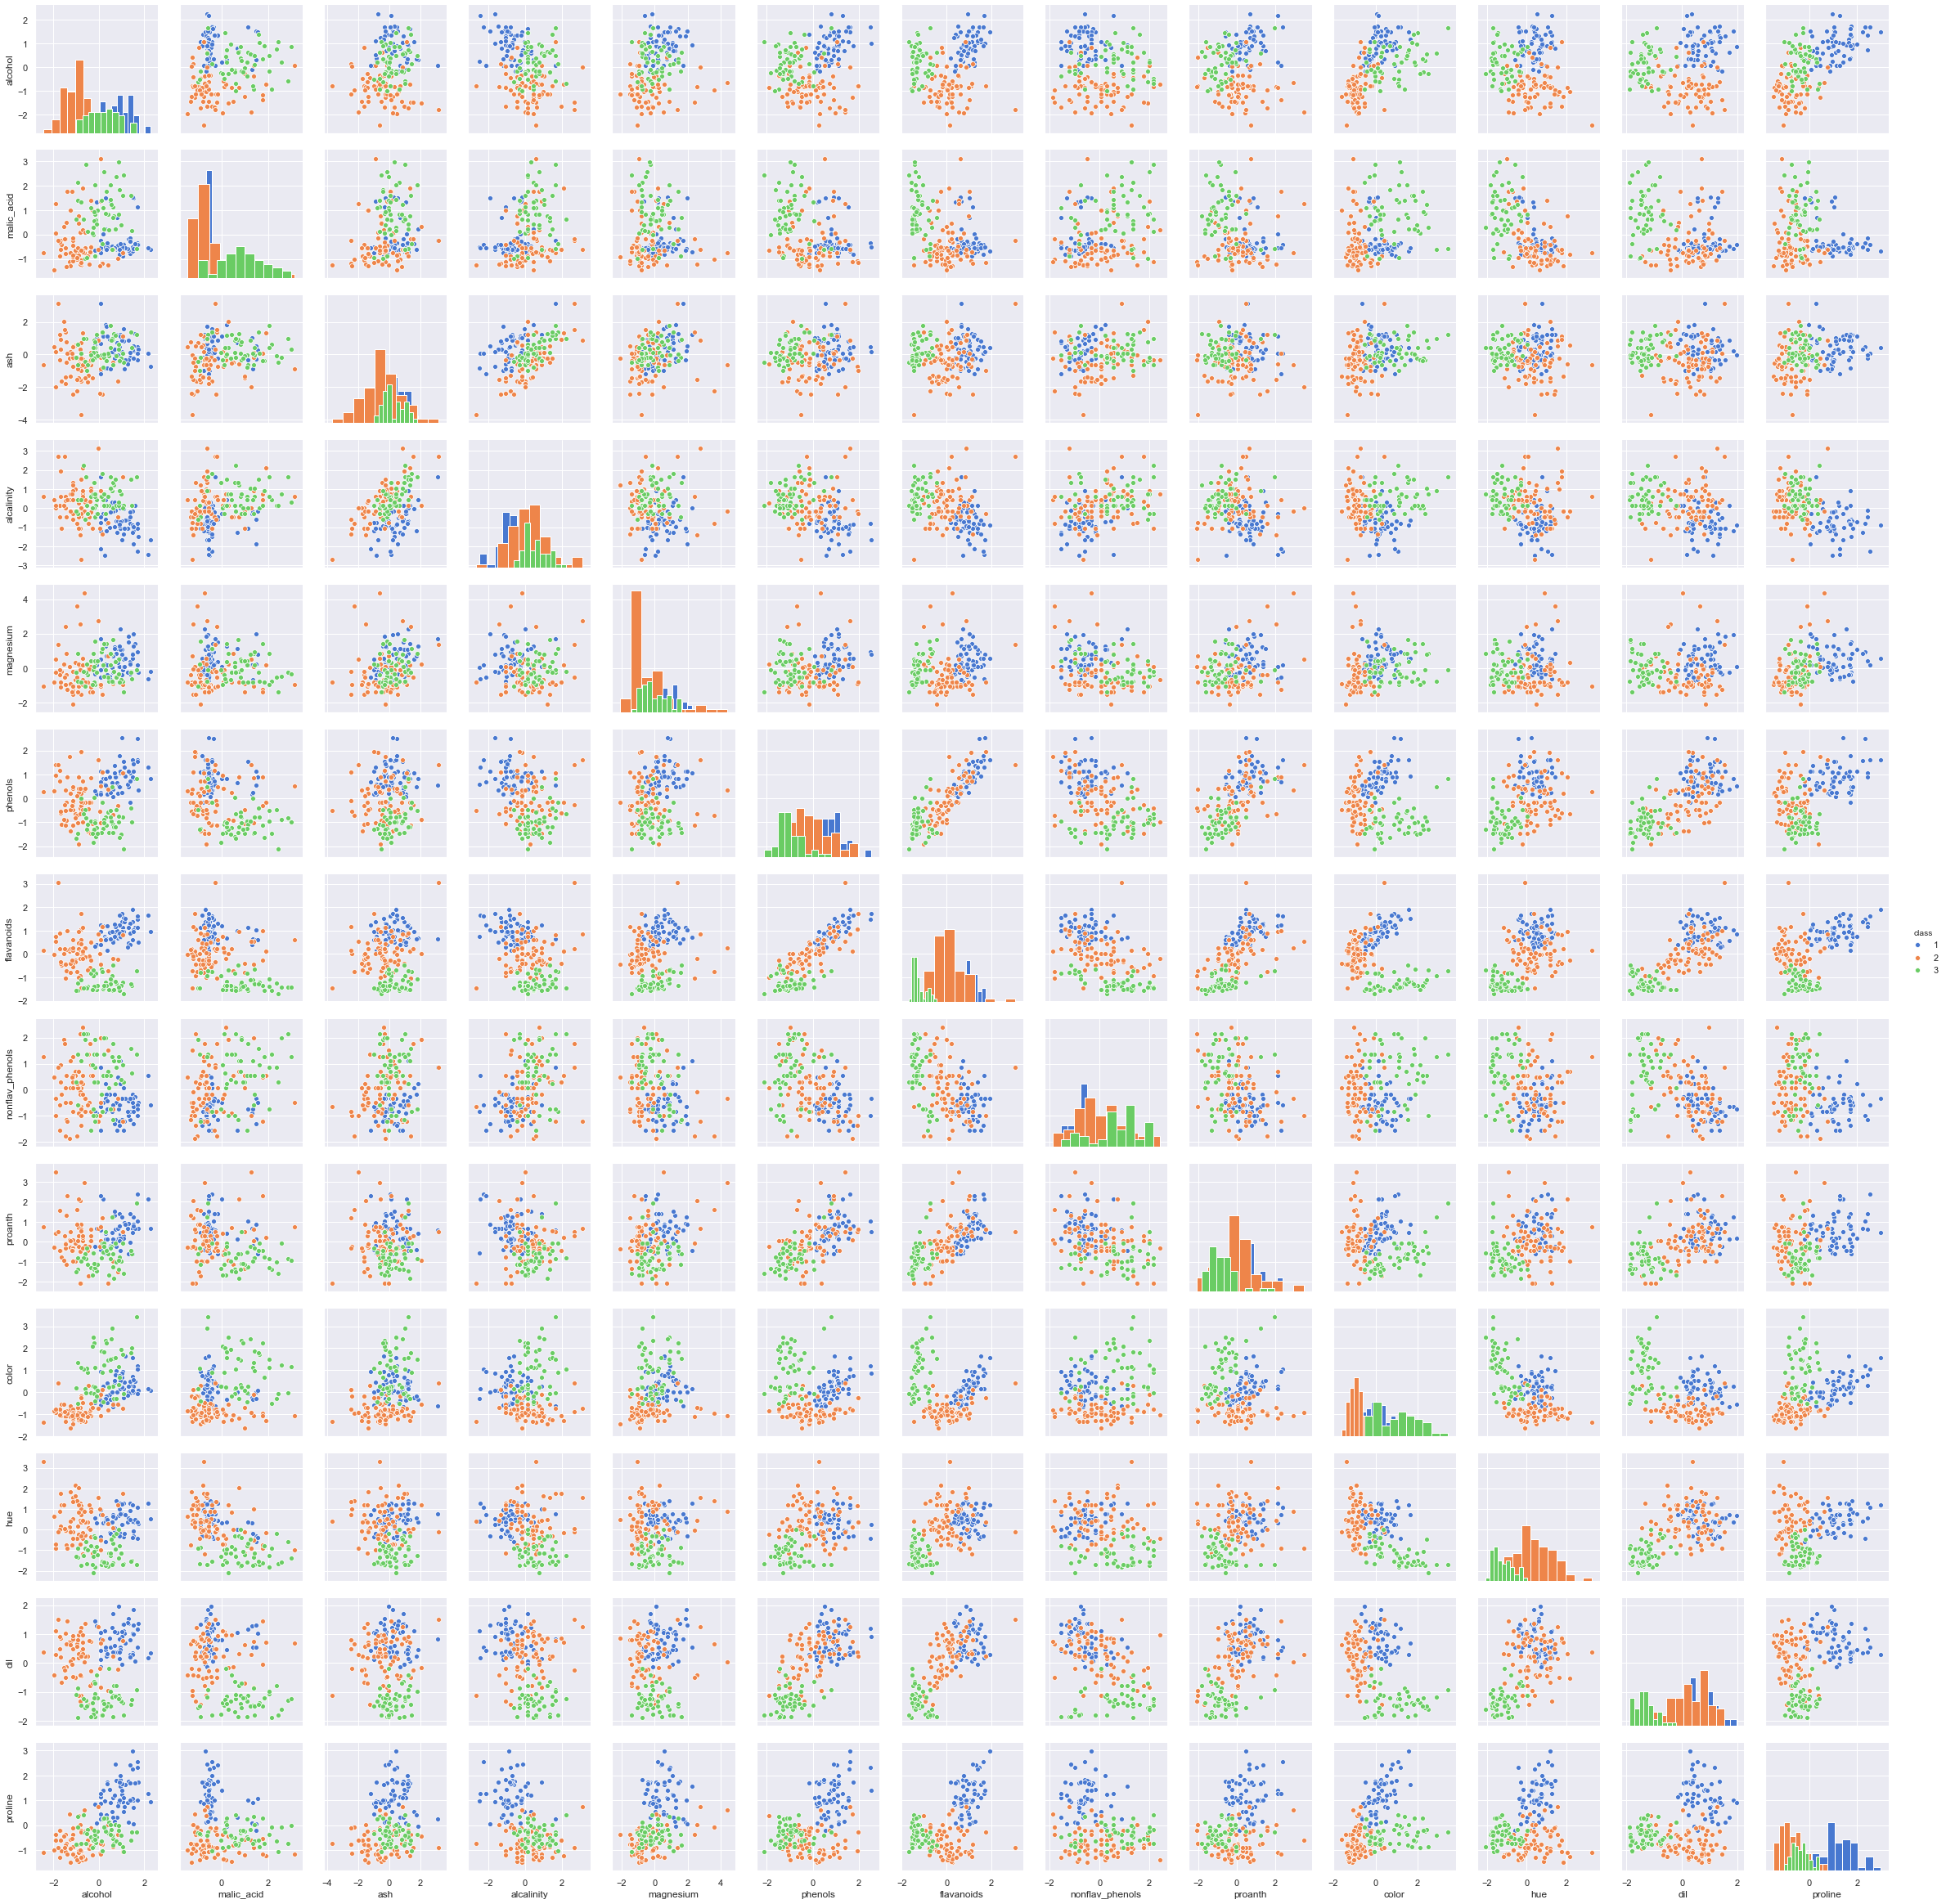

In [12]:
p = sns.pairplot(data=plot_df, hue='class', vars=features, diag_kind='hist')
plt.show()
plt.close()

### Boxplots for outlier detection

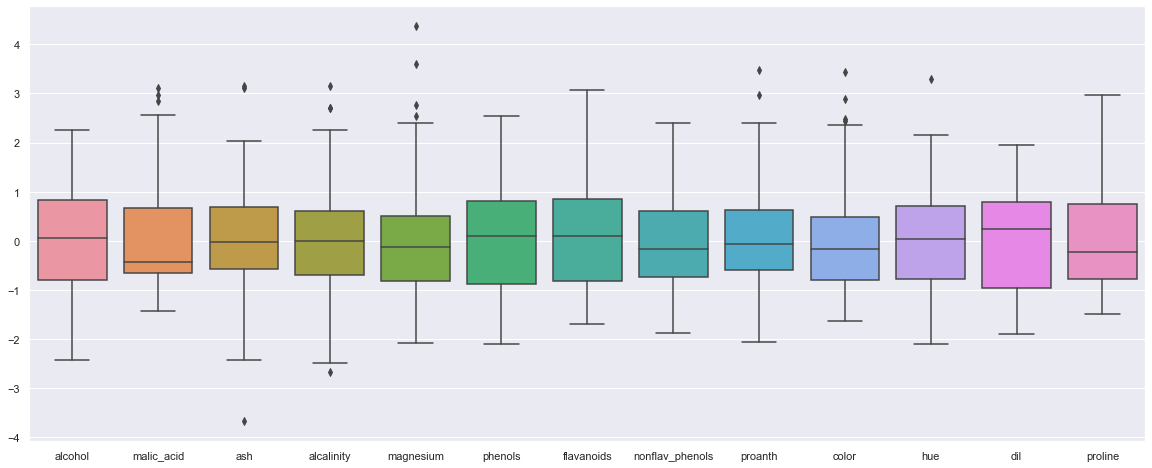

In [13]:
fig = plt.figure(figsize=[20, 8])
b = sns.boxplot(data=features_df)
plt.show()
plt.close()

#### No prominent outliers were observed

## Data preprocessing

In [14]:
X = features_df.loc[:].values
y = df.loc[:, 'class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Classification

### Support Vector Machine

In [15]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)
y_hat = svc.predict(X_train)
y_pred = svc.predict(X_test)
print('Evaluation:')
print('1. Accuracy')
print('Train score: ', svc.score(X_train, y_train))
print('Test score: ', svc.score(X_test, y_test))
print('2. F-1 measure')
print('Train score', f1_score(y_train, y_hat, average='micro'))
print('Test score', f1_score(y_test, y_pred, average='micro'))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Evaluation:
1. Accuracy
Train score:  1.0
Test score:  0.9775280898876404
2. F-1 measure
Train score 1.0
Test score 0.9775280898876404


### k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_hat = knn.predict(X_train)
y_pred = knn.predict(X_test)
print('Evaluation:')
print('1. Accuracy')
print('Train score: ', knn.score(X_train, y_train))
print('Test score: ', knn.score(X_test, y_test))
print('2. F-1 measure')
print('Train score', f1_score(y_train, y_hat, average='micro'))
print('Test score', f1_score(y_test, y_pred, average='micro'))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Evaluation:
1. Accuracy
Train score:  0.9775280898876404
Test score:  0.9887640449438202
2. F-1 measure
Train score 0.9775280898876404
Test score 0.9887640449438202


### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logr.fit(X_train, y_train)
y_hat = logr.predict(X_train)
y_pred = logr.predict(X_test)
print('Evaluation:')
print('1. Accuracy')
print('Train score: ', logr.score(X_train, y_train))
print('Test score: ', logr.score(X_test, y_test))
print('2. F-1 measure')
print('Train score', f1_score(y_train, y_hat, average='micro'))
print('Test score', f1_score(y_test, y_pred, average='micro'))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Evaluation:
1. Accuracy
Train score:  1.0
Test score:  0.9887640449438202
2. F-1 measure
Train score 1.0
Test score 0.9887640449438202


### Naive-Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_hat = nb.predict(X_train)
y_pred = nb.predict(X_test)
print('Evaluation:')
print('1. Accuracy')
print('Train score: ', nb.score(X_train, y_train))
print('Test score: ', nb.score(X_test, y_test))
print('2. F-1 measure')
print('Train score', f1_score(y_train, y_hat, average='micro'))
print('Test score', f1_score(y_test, y_pred, average='micro'))

GaussianNB(priors=None, var_smoothing=1e-09)

Evaluation:
1. Accuracy
Train score:  0.9775280898876404
Test score:  0.9887640449438202
2. F-1 measure
Train score 0.9775280898876404
Test score 0.9887640449438202


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_hat = dt.predict(X_train)
y_pred = dt.predict(X_test)
print('Evaluation:')
print('1. Accuracy')
print('Train score: ', dt.score(X_train, y_train))
print('Test score: ', dt.score(X_test, y_test))
print('2. F-1 measure')
print('Train score', f1_score(y_train, y_hat, average='micro'))
print('Test score', f1_score(y_test, y_pred, average='micro'))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Evaluation:
1. Accuracy
Train score:  1.0
Test score:  0.8314606741573034
2. F-1 measure
Train score 1.0
Test score 0.8314606741573034


### Ensemble Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_train)
y_pred = rf.predict(X_test)
print('Evaluation:')
print('1. Accuracy')
print('Train score: ', rf.score(X_train, y_train))
print('Test score: ', rf.score(X_test, y_test))
print('2. F-1 measure')
print('Train score', f1_score(y_train, y_hat, average='micro'))
print('Test score', f1_score(y_test, y_pred, average='micro'))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Evaluation:
1. Accuracy
Train score:  1.0
Test score:  0.9550561797752809
2. F-1 measure
Train score 1.0
Test score 0.9550561797752809


## Visualization with PCA

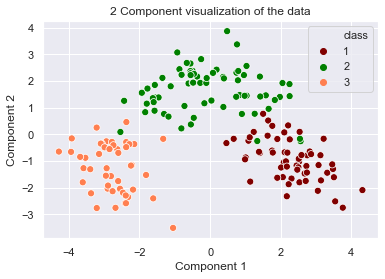

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

principal_df = pd.DataFrame(principal_components,
                            columns=['Component 1', 'Component 2'])

comp_df = pd.concat([principal_df, df['class']], axis=1)

sc = sns.scatterplot(x='Component 1',
                     y='Component 2',
                     data=comp_df,
                     hue='class',
                     s=50,
                     legend='full',
                     palette=['maroon', 'green', 'coral'])
t = plt.title('2 Component visualization of the data')
plt.show()
plt.close()